# EDSA - Climate Change Belief Analysis 2021
------------------

<img src="pic/climate-change.jpg"
     width="400" 
     height="500" >

Climate Change is the current rapid warming of the Earth's climate change caused by human activity.If left unchecked (and current responses are doing little to halt it) it posses an unprecedented threat to human civilisation and the ecosystem on this planet.As we are given a task on creating an algorithm Machine Learning model that is able to classify whether or not a person believes in climate change, based on their tweet.

### Contents
---------------
1. Introduction
2. Import Packages
3. Loading Data and Exploratory Data Analysis (EDA)
4. Pre-Processing and further EDA
5. Model Building
    * Model 1 2 3 etc
    *
6. Model Assessment
    * Comparisons of models
    *
7. Conclusion 

## 2. Import Packages
--------------------
To carry out EDA, model building and assessment of model performance

In [58]:
# import comet_ml
#from comet_ml import Experiment

In [62]:
# Numpy and Pandas
import numpy as np
import pandas as pd

# Visualisations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Scikit Learn 
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
#from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer


# NLTK
import nltk
from nltk.corpus import stopwords
from nltk.corpus import words
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

#Extra
from textblob import TextBlob
from langdetect import detect
from wordcloud import WordCloud

## 3. Loading Data and Exploratory Data Analysis (EDA)
-------------------
The data is provided in two files: train.csv and test_with_no_labels.csv and pertains to climate change tweets collected between Apr 27, 2015 and Feb 21, 2018. The train.csv will be used to train the classifier model and the test_no_labels.csv will be used to test the model's classifying accuracy.

### 3.1. Training Dataset
-----------
The training set has 15819 rows and 3 columns, sentiment, made up of integer type data, message, made up of object type data and tweetid, made up of integer type data. Each row represents one observation and each column, a feature. 

**Columns:**
* **message** : the written tweet, on climate change.
* **tweetid** : identifier of a status/message on twitter
* **sentiment** : expresses the view/opinion of climate change (Belief or Disbelief in  climate change, ranges from -1 to 2)
        * -1. Anti - Climate Change: the tweet does not believe in man-made climate change
        * 0. Neutral: the tweet neither supports nor refutes the belief of man-made climate change 
        * 1. Pro - Climate Change: the tweet supports the belief of man-made climate change
        * 2. News : the tweet links to factual news about climate change

In [63]:
# loading and reading train.csv to a Dataframe
train = pd.read_csv('train.csv')

In [64]:
# Overview of the train_df dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


In [65]:
# View first five rows of train_df
train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


### 3.2. Testing Dataset
------------
The testing set has 10546 rows and 2 columns; message and tweetid. The sentiment is to be predicted by classification.

In [66]:
# loading and reading test_with_no_labels.csv to a Dataframe
test = pd.read_csv('test_with_no_labels.csv')

In [67]:
# Overview of the test_df dataset
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10546 entries, 0 to 10545
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  10546 non-null  object
 1   tweetid  10546 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 164.9+ KB


In [68]:
# View first five rows of test_df
test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


### 3.3. EDA of Training Data
-----------
**Distribution of the Response**

The distribution of the label variable (sentiment) provides insight into the frequencies per category of the sentiment (-1 to 2) expressed by each tweet. This gives an indication of the more popular vs unpopular opinions on climate change. Given the categorical nature of this variable a countplot provides the best insight into the frequencies for each category.

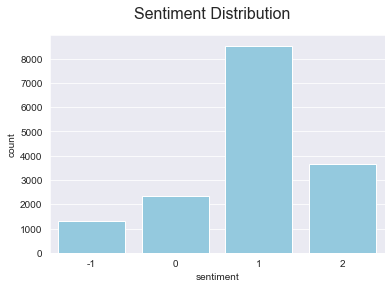

In [69]:
# Count plot distribution of sentiments expressed by each tweet
sns.set_style('darkgrid')
sns.countplot(x = train['sentiment'], data = train, color = 'skyblue')
plt.suptitle('Sentiment Distribution', fontsize = 16)
plt.show()

The distribution of sentiments shows a clear difference in the frequencies observed for each sentiment, with the 'Pro' climate change tweets making up majority of the opinions expressed within this data set at over 8000 counts. 'Anti' climate changes tweets make up the lowest number of opinons with just over 1000 counts and with more people having a neutral response towards climate change than dibelieving in it. The number of News/factual tweets is higher than both that of 'Anti' and 'Neutral' views over 3000 views. 

The following table of value counts further describes the difference in frequency between each sentiment.

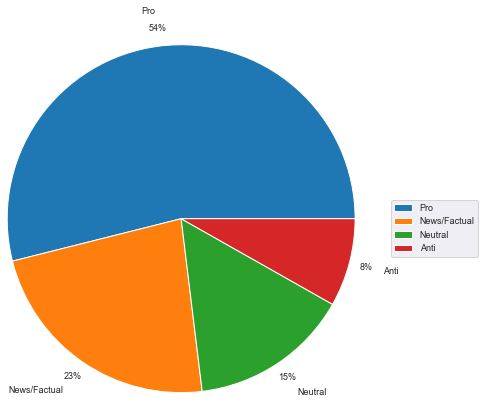

In [70]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 9.0
labels =['Pro', 'News/Factual', 'Neutral', 'Anti']
size = train['sentiment'].value_counts()
#plt.title("finding the motive behind the sentiments",
          #fontsize = 10)
plt.pie(size, labels=labels, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2,radius=2)
#plt.legend( labels, loc="lower")
#plt.legend(labels, handles=labels, title='title', bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=10.)
plt.show()

We plotted a pie chart to determine which sentiment has the highest tweet in the data and found out that ,most of the tweet are from people who believe in climate change and the least performing sentiment is those who don't believe in climate change which are being classified as "Anti".

In [71]:
# Total number of observations for each sentiment
sentiment_counts = pd.DataFrame(train['sentiment'].value_counts())
sentiment_counts['View'] = ['Pro', 'News/Factual', 'Neutral', 'Anti']
sentiment_counts.sort_index(axis=1)

,View,sentiment
1,Pro,8530
2,News/Factual,3640
0,Neutral,2353
-1,Anti,1296


**Features / Preditors**

suggestions for EDA;
* look at handles and see if people tweeted more than once, how to deal with that etc?

## 4. Pre-Processing and further EDA
--------------

### 4.1 Removing unneccessary information
------------
Tweets may contain links that does not hold any valuable information. Therefore they will be replaced with a fixed term representing them.

In [72]:
print(f'The number of rows with links --> {len(train[train["message"].str.contains("http")]["message"])} rows')

The number of rows with links --> 8764 rows


Changing all url links to the word `link`, because the url links would be useless if it was left in it's current state when punctuations are removed.

In [73]:
def change_links(df, column):
    regex_pattern = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
    df[column] = df[column].replace(to_replace = regex_pattern, 
                                    value = '', 
                                    regex = True)

In [74]:
change_links(train, 'message')

### 4.2 Language Check
--------------
Checking for posts that contain foreign languages

In [75]:
def lang_check(post):
    lang = detect(post)
    return lang

In [76]:
train['language'] = train['message'].apply(lang_check)

In [77]:
train.head()

,sentiment,message,tweetid,language
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,en
1,1,It's not like we lack evidence of anthropogeni...,126103,en
2,2,RT @RawStory: Researchers say we have three ye...,698562,en
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,en
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,en


Filtering DataFrame to only contain posts that are english. Having a DataFrame with different languages is problematic when cleaning the data, this could cause unnecessary information to remain.

In [78]:
# train = train[train['language'] == 'en']

### 4.3 Removing stop words
------------
Stopwords contain no valuable information, therefore excluding them will highlight key terms.

In [79]:
train['message'] = train['message'].str.lower()

In [80]:
stop = stopwords.words('english')

In [81]:
def stop_words(post):
    post = ' '.join([word for word in post.split() if word not in stop])
    return post

In [82]:
train['message'] = train['message'].apply(stop_words)

### 4.4 Removing punctuations
------------
Punctuations are excluded to ensure that the model does not misinterpret the key phrases.

In [83]:
import string

In [84]:
def remove_punctuation(post):
    post = ''.join([x for x in post if x not in string.punctuation])
    return post

In [85]:
train['message'] = train['message'].apply(remove_punctuation)

### 4.5 Spelling Check
------------
Spell check to ensure that there are no misspelled words. 

In [86]:
def spell_check(post):
    blob = TextBlob(post)
    post = str(blob.correct())
    return post

In [ ]:
train['message'] = train['message'].apply(spell_check)

### 4.6 Lemmatization
------
Lemmatizing words to their base form will ensure that words with similar meaning be represented in the same way. 

Stemming is not an option because it looks for similarity in words and often returns words that have no meaning/value. 

In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
def lemmatize_(post):
    row = []
    for word in post.split():
        lem = lemmatizer.lemmatize(word)
        row.append(lem)
    post_ = ' '.join(row)
    return post_

In [ ]:
train['message'] = train['message'].apply(lemmatize_)

### Remove digits and alphanumeric words

In [ ]:
def return_alpha(post):
    post_ = ' '.join([word for word in post.split() if word.isalpha()])
    return post_

In [ ]:
train['message'] = train['message'].apply(return_alpha)

### 4.7 Vocabulary Check
------
Tweets may contain usernames / alphanumeric words that are made-up and not part of the english vocabulary. Therefore all words will be compared with the vocabulary from `nltk.corpus` `words` module.

In [ ]:
vocab = words.words()

In [ ]:
def word_check(post):
    checked = ' '.join([word for word in post.split() if word in vocab])
    return checked

In [ ]:
train['message'] = train['message'].apply(word_check)

### 4.8 Handling the imbalanced data
------
Firstly, we group the 4 classes into 2 discrete classes, 0 and 1.

Combining all the words in each row into one string to plot in a `WordCloud` to visualise the frequency of words.

In [ ]:
words = []
for post in df_x['message']:
    for word in post.split():
        words.append(word)
text = ' '.join(words)

#### WordCloud

In [ ]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white').generate(text)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
words = df_x['message']:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(words))
plt.imshow(wc)

## 5. Model Building 
---
The model building section is only for model building not for comparison between each models results, that will be covered in the next section.
<br></br>
#### <b><u>Models being used:</u></b>
<ul>
    <li>LInearSVC</li>
    <li>Naive Bayes</li>
    <li>Random Forest</li>
    <li>KNeighbors</li>
    <li>Logistic Regression</li>
</ul>

#### Procedure for the model building section
---
<ol>
    <li>Assign the independent variable and target variable to variables X and y, respectively</li>
    <li>Split the data into a train and validation set</li>
    <li>Create a pipeline to set workflow (contains vectorizer and model)</li>
    <li>Create a dictionary with parameters for the vectorizer and model</li>
    <li>Assign the variables created in <b>Step 3</b> and <b>Step 4</b> to the Cross Vaildation algorithm</li>
    <li>Fit the Cross Validation algorithm to the train set.</li>
    <li>Observe the best parameters. Display the best score gained from these parameters</li>
</ol>
<b><u>Note:</u></b> Step 3 to Step 7 will be repeated for all models. Each paramter in Step 4 must have list of value(s) to be used in the Cross Validation process. 


In [5]:
# Declaring the X and y variables
X = train['message']
y = train['sentiment']

Splitting the data into 75% train and 25% test with a `random_state` of 42

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

After splitting our data, we can begin to use it to train our models.

Firstly, we will be looking at the `LinearSVC` model.

### 5.1 LinearSVC
----------

Support Vector Machine SVM  which is known as(discriminative classifier) is an exciting algorithm,that separates data  using a hyperplane with the largest amount of margin. SVM finds an optimal hyperplane which helps in classifying new data points.Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.

The advantages of support vector machines are:

- Effective in high dimensional spaces.

- Still effective in cases where number of dimensions is greater than the number of samples.

- Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.

- Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels

In [7]:
lsvc_ = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('lsvc', LinearSVC())
])

In [8]:
lsvc_params = {
    'lsvc__C': [0.2, 0.3],
    'tfidf__ngram_range' : [(1,1),(1,2)],
    'lsvc__max_iter': [500, 1000],
    'tfidf__min_df': [2, 1],
    'tfidf__max_df': [0.7, 0.8], 
    'lsvc__class_weight': ['balanced']
}

In [9]:
ls_cv = GridSearchCV(
    lsvc_, 
    param_grid = lsvc_params, 
    cv = 5, 
    scoring = 'f1_weighted'
)

In [10]:
ls_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('lsvc', LinearSVC())]),
             param_grid={'lsvc__C': [0.2, 0.3],
                         'lsvc__class_weight': ['balanced'],
                         'lsvc__max_iter': [500, 1000],
                         'tfidf__max_df': [0.7, 0.8], 'tfidf__min_df': [2, 1],
                         'tfidf__ngram_range': [(1, 1), (1, 2)]},
             scoring='f1_weighted')

In [69]:
ls_cv.best_params_

{'lsvc__C': 0.3,
 'lsvc__class_weight': 'balanced',
 'lsvc__max_iter': 500,
 'tfidf__max_df': 0.8,
 'tfidf__min_df': 2,
 'tfidf__ngram_range': (1, 2)}

In [49]:
ls_cv.best_score_

0.7359425854431167

Next, we will be looking at the `Naive Bayes` model.

### 5.2 Naive Bayes
-----------

Naive Bayes classifiers are a collection of classification algorithms based on Bayes’ Theorem.Bayes Theorem is a  way of calculating a conditional probability.Naive Bayes classifier is a collection of many algorithms where all the algorithms share one common principle, that is each feature being classified is not related to any other feature.The presence or absence of a feature does not affect the presence or absence of the other feature.

Multinomial Naive Bayes algorithm is a probabilistic learning method that is mostly used in Natural Language Processing (NLP). The algorithm is based on the Bayes theorem and predicts the tag of a text such as a piece of email or newspaper article. It calculates the probability of each tag for a given sample and then gives the tag with the highest probability as output.
The good about  Multinomial Navie Bayes algorithm:

- It is easy to implement as you only have to calculate probability.
- You can use this algorithm on both continuous and discrete data.

In [13]:
mnb_ = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', MultinomialNB())
])

In [14]:
mnb_params = {
    'clf__alpha': [0.7, 0.8, 0.9], 
    'tfidf__ngram_range' : [(1,1),(1,2)], 
    'tfidf__min_df': [2, 1], 
    'tfidf__max_df': [0.7, 0.8, 0.9]
}

In [ ]:
nbcv = GridSearchCV(
    mnb_, 
    param_grid = mnb_params, 
    scoring = 'f1_weighted', 
    cv = 5
)

In [16]:
nbcv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('clf', MultinomialNB())]),
             param_grid={'clf__alpha': [0.7, 0.8, 0.9],
                         'tfidf__max_df': [0.7, 0.8, 0.9],
                         'tfidf__min_df': [2, 1],
                         'tfidf__ngram_range': [(1, 1), (1, 2)]},
             scoring='f1_weighted')

In [17]:
nbcv.best_params_

{'clf__alpha': 0.7,
 'tfidf__max_df': 0.7,
 'tfidf__min_df': 2,
 'tfidf__ngram_range': (1, 1)}

In [18]:
nbcv.best_score_

0.6161650660595644

Next, we will be looking at the `Random Forest` model.

### 5.3 Random Forest
------------

The Random forest is a supervised Machine learning algorithm used for classification, regression, and other tasks using decision trees.
The Random forest classifier creates a set of decision trees from a randomly selected subset of the training set. It collects  votes from different decision trees to decide the final prediction.A Random Forest uses  multiple decision trees and a technique called Bootstrap and Aggregation, commonly known as bagging. The basic idea behind this is to combine multiple decision trees in determining the final output rather than relying on individual decision trees. We randomly perform row sampling and feature sampling from the dataset forming sample datasets for every model. This part is called Bootstrap.

In [19]:
rf_ = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('rf', RandomForestClassifier())
])

In [28]:
rf_params = {
    'rf__n_estimators': [100, 200], 
    'rf__max_depth': [4, 5], 
    'rf__class_weight': ['balanced'], 
    'rf__min_samples_split': [4, 5], 
    'tfidf__max_df': [0.8, 0.7], 
    'tfidf__ngram_range' : [(1,1),(1,2)], 
    'tfidf__min_df': [2, 1]
}

In [29]:
rf_cv = GridSearchCV(
    rf_, 
    param_grid = rf_params, 
    scoring = 'f1_weighted', 
    cv = 5
)

In [30]:
rf_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('rf', RandomForestClassifier())]),
             param_grid={'rf__class_weight': ['balanced'],
                         'rf__max_depth': [4, 5],
                         'rf__min_samples_split': [4, 5],
                         'rf__n_estimators': [100, 200],
                         'tfidf__max_df': [0.8, 0.7], 'tfidf__min_df': [2, 1],
                         'tfidf__ngram_range': [(1, 1), (1, 2)]},
             scoring='f1_weighted')

In [31]:
rf_cv.best_params_

{'rf__class_weight': 'balanced',
 'rf__max_depth': 5,
 'rf__min_samples_split': 5,
 'rf__n_estimators': 200,
 'tfidf__max_df': 0.8,
 'tfidf__min_df': 2,
 'tfidf__ngram_range': (1, 2)}

In [32]:
rf_cv.best_score_

0.5293515316905782

Next, we will be looking at the `KNeighbors` models

### 5.4 KNeighbors
------------

K-Nearest Neighbors commonly known as KNN is one of the most basic yet essential classification algorithms in Machine Learning. It belongs to the supervised learning domain and finds intense application in pattern recognition, data mining and intrusion detection.It is widely disposable in real-life scenarios since it is non-parametric, meaning, it does not make any underlying assumptions about the distribution of data.

In [33]:
knn_ = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('knn', KNeighborsClassifier())
])

In [34]:
knn_params = {
    'knn__n_neighbors': [5, 6], 
    'tfidf__max_df': [0.8, 0.7], 
    'tfidf__ngram_range' : [(1,1),(1,2)], 
    'tfidf__min_df': [2, 1]
}

In [36]:
knn_cv = GridSearchCV(
    knn_, 
    param_grid = knn_params, 
    scoring = 'f1_weighted', 
    cv = 10
)

In [37]:
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [5, 6],
                         'tfidf__max_df': [0.8, 0.7], 'tfidf__min_df': [2, 1],
                         'tfidf__ngram_range': [(1, 1), (1, 2)]},
             scoring='f1_weighted')

In [38]:
knn_cv.best_params_

{'knn__n_neighbors': 6,
 'tfidf__max_df': 0.8,
 'tfidf__min_df': 1,
 'tfidf__ngram_range': (1, 1)}

In [39]:
knn_cv.best_score_

0.6588795139135771

Next, we will be looking at the `Logistic Regression` model.

### 5.5 Logistic Regression
------------

Logistic Regression is a machine learning algorithm used for classification tasks. The name ‘Regression’ here implies that a linear model is fit into the feature space. The algorithm that  applies a logistic function to a linear combination of features to predict the outcome of a categorical dependent variable based on predictor variables. Logistic regression algorithms help estimate the probability of falling into a specific level of the categorical dependent variable based on the given predictor variables.

In [59]:
lr_ = Pipeline([
    ('tfidf', TfidfVectorizer()), 
    ('lr', LogisticRegression())
])

In [63]:
lr_params = {
    'lr__C': [0.2, 0.3],
    'lr__class_weight': ['balanced'],
    'tfidf__max_df': [0.8, 0.7], 
    'tfidf__ngram_range' : [(1,1),(1,2)], 
    'tfidf__min_df': [2, 1]
}

In [64]:
lr_cv = GridSearchCV(
    lr_,
    param_grid = lr_params,
    scoring = 'f1_weighted',
    cv = 5
)

In [65]:
lr_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('lr', LogisticRegression())]),
             param_grid={'lr__C': [0.2, 0.3], 'lr__class_weight': ['balanced'],
                         'tfidf__max_df': [0.8, 0.7], 'tfidf__min_df': [2, 1],
                         'tfidf__ngram_range': [(1, 1), (1, 2)]},
             scoring='f1_weighted')

In [66]:
lr_cv.best_params_

{'lr__C': 0.3,
 'lr__class_weight': 'balanced',
 'tfidf__max_df': 0.8,
 'tfidf__min_df': 2,
 'tfidf__ngram_range': (1, 2)}

In [67]:
lr_cv.best_score_

0.6754365903143709

All the models has been fitted, now we move to the Model Assessment section.

## 6. Model Assessment 
--------------
We will be observing the performance of each model and then comparing them to see which one had a best performance.
<br></br>
- We will first make a predict on the X validation set for each model
- We will be using the `classification report` and `confusion matrix` to observe each model's preformance.
- We will compare each model's `precision`, `recall` and `f1` scores to see which one performed the best


### LinearSVC

In [70]:
ls_ypred = ls_cv.predict(X_test)

In [96]:
print(classification_report(y_test, ls_ypred))

              precision    recall  f1-score   support

          -1       0.66      0.56      0.61       336
           0       0.57      0.54      0.55       547
           1       0.83      0.81      0.82      2178
           2       0.73      0.85      0.78       894

    accuracy                           0.76      3955
   macro avg       0.70      0.69      0.69      3955
weighted avg       0.76      0.76      0.76      3955



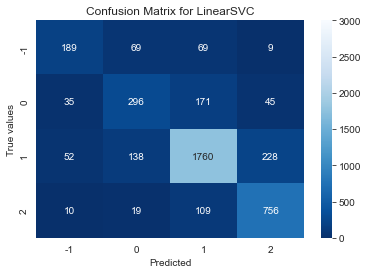

In [112]:
sns.set_style('darkgrid')
sns.heatmap(
    confusion_matrix(y_test, ls_ypred), 
    cmap = "Blues_r", 
    xticklabels = ls_cv.classes_, 
    yticklabels = ls_cv.classes_, 
    vmin = 0, 
    vmax = 3000, 
    annot = True, 
    fmt = 'g'
)

# Adding headings and lables
plt.title('Confusion Matrix for LinearSVC')
plt.ylabel('True values')
plt.xlabel('Predicted')
plt.show()

### Naive Bayes

In [110]:
nb_y = nbcv.predict(X_test)

In [111]:
print(classification_report(y_test, nb_y))

              precision    recall  f1-score   support

          -1       0.97      0.10      0.17       336
           0       0.80      0.12      0.21       547
           1       0.66      0.96      0.78      2178
           2       0.83      0.65      0.73       894

    accuracy                           0.70      3955
   macro avg       0.82      0.46      0.47      3955
weighted avg       0.75      0.70      0.64      3955



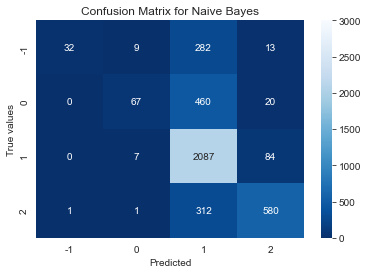

In [113]:
sns.heatmap(
    confusion_matrix(y_test, nb_y), 
    cmap = "Blues_r", 
    xticklabels = nbcv.classes_, 
    yticklabels = nbcv.classes_, 
    vmin = 0, 
    vmax = 3000, 
    annot = True, 
    fmt = 'g'
)

# Adding headings and lables
plt.title('Confusion Matrix for Naive Bayes')
plt.ylabel('True values')
plt.xlabel('Predicted')
plt.show()

### Random Forest

In [115]:
y_pred = rf_cv.predict(X_test)

In [116]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.37      0.43      0.40       336
           0       0.37      0.53      0.44       547
           1       0.83      0.40      0.54      2178
           2       0.45      0.86      0.59       894

    accuracy                           0.53      3955
   macro avg       0.51      0.56      0.49      3955
weighted avg       0.64      0.53      0.53      3955



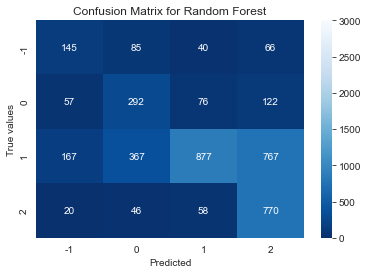

In [117]:
sns.heatmap(
    confusion_matrix(y_test, y_pred), 
    cmap = "Blues_r", 
    xticklabels = rf_cv.classes_, 
    yticklabels = rf_cv.classes_, 
    vmin = 0, 
    vmax = 3000, 
    annot = True, 
    fmt = 'g'
)

plt.title('Confusion Matrix for Random Forest')
plt.ylabel('True values')
plt.xlabel('Predicted')
plt.show()

### KNeighbors

In [118]:
y_p = knn_cv.predict(X_test)

In [119]:
print(classification_report(y_test, y_p))

              precision    recall  f1-score   support

          -1       0.58      0.38      0.46       336
           0       0.48      0.39      0.43       547
           1       0.73      0.83      0.78      2178
           2       0.70      0.66      0.68       894

    accuracy                           0.69      3955
   macro avg       0.62      0.56      0.59      3955
weighted avg       0.68      0.69      0.68      3955



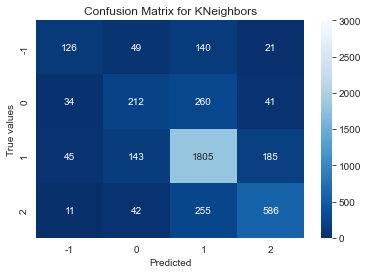

In [120]:
sns.heatmap(
    confusion_matrix(y_test, y_p), 
    cmap = "Blues_r", 
    xticklabels = knn_cv.classes_, 
    yticklabels = knn_cv.classes_, 
    vmin = 0, 
    vmax = 3000, 
    annot = True, 
    fmt = 'g'
)

plt.title('Confusion Matrix for KNeighbors')
plt.ylabel('True values')
plt.xlabel('Predicted')
plt.show()

### Logistic Regression

In [121]:
lr_ypred = lr_cv.predict(X_test)

In [122]:
print(classification_report(y_test, lr_ypred))

              precision    recall  f1-score   support

          -1       0.50      0.62      0.55       336
           0       0.46      0.58      0.51       547
           1       0.86      0.64      0.73      2178
           2       0.63      0.88      0.74       894

    accuracy                           0.68      3955
   macro avg       0.61      0.68      0.63      3955
weighted avg       0.72      0.68      0.69      3955



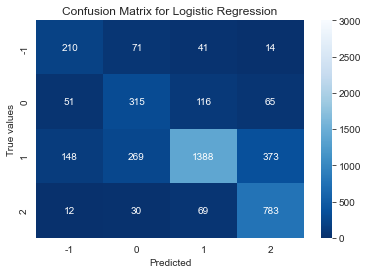

In [123]:
sns.heatmap(
    confusion_matrix(y_test, lr_ypred), 
    cmap = "Blues_r", 
    xticklabels = lr_cv.classes_, 
    yticklabels = lr_cv.classes_, 
    vmin = 0, 
    vmax = 3000, 
    annot = True, 
    fmt = 'g'
)

plt.title('Confusion Matrix for Logistic Regression')
plt.ylabel('True values')
plt.xlabel('Predicted')
plt.show()

### Test Set

In [125]:
y_pred_ = ls_cv.predict(test['message'])

In [126]:
submission = pd.DataFrame({'tweetid': test['tweetid'], 
                           'sentiment': y_pred_})

In [127]:
submission

,tweetid,sentiment
0,169760,1
1,35326,1
2,224985,1
3,476263,1
4,872928,0
...,...,...
10541,895714,-1
10542,875167,1
10543,78329,2
10544,867455,0


In [ ]:
submission.to_csv('submission.csv', index = False)

## 7. Conclusion
--------